<a href="https://colab.research.google.com/github/mounsifelatouch/OIBSIP/blob/master/Task2/UnemploymentAnalysisPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oasis Infobyte Internship (15 October - 15 November, 2023)
## Data Science Internship
### <u>`Task 2`</u> : `UNEMPLOYMENT ANALYSIS WITH PYTHON`
#### `MOUNSIF EL ATOUCH`

This study aims to `compare unemployment rates across different states or areas` to understand disparities in employment conditions. Visualizations like bar charts or choropleth maps will be used to highlight variations and identify regions with higher or lower unemployment rates. This analysis provides valuable insights for informed decision-making, targeted interventions, and policy formulation to address regional employment disparities.

In [1]:
# Needed packages
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical computations and handling arrays
import matplotlib.pyplot as plt     # For data visualization
import seaborn as sns               # For enhanced data visualization
import plotly.express as px
from sklearn.model_selection import train_test_split      # For dataset splitting
from datetime import datetime       # For working with dates and times
import warnings
warnings.filterwarnings("ignore")                         # Disable warnings
%matplotlib inline

In [2]:
# Download the dataset
! wget https://raw.githubusercontent.com/mounsifelatouch/OIBSIP/master/Task2/Unemployment%20in%20India.csv

--2023-10-18 20:43:08--  https://raw.githubusercontent.com/mounsifelatouch/OIBSIP/master/Task2/Unemployment%20in%20India.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46274 (45K) [text/plain]
Saving to: ‘Unemployment in India.csv’

Unemployment in Ind 100%[===================>]  45.19K  --.-KB/s    in 0.001s  

2023-10-18 20:43:08 (34.7 MB/s) - ‘Unemployment in India.csv’ saved [46274/46274]



In [3]:
# Load the dataset
data = pd.read_csv("/content/Unemployment in India.csv")

In [4]:
# Disply the first few rows of the dataset
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


`* Labor Force (LF)?`
all the members of a particular organization or country who are able to work. <br />
( the sum of the employed plus the unemployed )

`* Labour Participation Rate (LPR)?`
is percentage of all people of working age who are employed or are actively seeking work. <br />

`* Unemployment Rate (UR)?`
is the percentage of people in the labour force who are unemployed. <br />

In [5]:
# Check column names
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Let's rename columns for consistency and easier access.

In [6]:
columns = ['State', 'Date', 'Frequency', 'EUR', 'EE', 'ELPR', 'Area']
data.columns = columns

# Check column names again
data.columns

Index(['State', 'Date', 'Frequency', 'EUR', 'EE', 'ELPR', 'Area'], dtype='object')

In [7]:
# Check for any missing value
data.isnull().sum()     # 28 NaN for each variable

State        28
Date         28
Frequency    28
EUR          28
EE           28
ELPR         28
Area         28
dtype: int64

In [8]:
# Identify rows that have NaN
data[data.isnull().any(axis=1)].index    # 28 rows

Int64Index([359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
            372, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765,
            766, 767],
           dtype='int64')

In [9]:
# Display the first few rows with NaN
rows_with_nan  = data[data.isnull().any(axis=True)]
rows_with_nan.head()

,State,Date,Frequency,EUR,EE,ELPR,Area
359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Calculate the percentage of NaN
percentage = (rows_with_nan.shape[0]/data.shape[0])*100
percentage = np.round(percentage, 2)
print('The percentage of missing values in the data is: {} %'.format(percentage))

The percentage of missing values in the data is: 3.65 %


<u>`Comment :`</u><br />
Given that the percentage of missing values does not exceed `5%` of the total variables (3.65%), we have decided to remove rows that contain missing values as a data preprocessing step.


In [11]:
# Drop missing values
df = data.dropna()

In [12]:
# Check again for any missing value
df.isnull().sum()

State        0
Date         0
Frequency    0
EUR          0
EE           0
ELPR         0
Area         0
dtype: int64

In [13]:
# Basic info about the datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      740 non-null    object 
 1   Date       740 non-null    object 
 2   Frequency  740 non-null    object 
 3   EUR        740 non-null    float64
 4   EE         740 non-null    float64
 5   ELPR       740 non-null    float64
 6   Area       740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Let's now convert `Date` column to a `datetime` data type for easier manipulation and analysis.

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

# Check if the conversion was done correctly
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 740 entries, 0 to 753
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
740 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.6 KB


Let's extract Month and Year components from `Date` column for subsequent analysis and visualization purposes.

In [15]:
date = pd.DatetimeIndex(df['Date'])

# Extract month then convert it as an integer to the month name
df['Month'] = date.month

# Extract Year as Integer
df['Year'] = date.year

# Display data
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Area,Month,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,2019


In [16]:
# Drop Frequency column
df = df.drop(columns = ['Frequency'])

In [17]:
df['State'].nunique()     # There are 28 states

28

In [18]:
df['Area'].nunique()     # There are two areas : Rural & Urban

2

* `Rural Area` refers to regions that are characterized by low population density and a predominantly agricultural or natural environment.

* `Urban Area` refers to regions that are characterized by high population density, extensive built-up environments, and a concentration of residential, commercial, and industrial facilities.

In [19]:
df['Year'].unique()

array([2019, 2020])

In [20]:
print('Print the unique values of the "Month" column in a DataFrame df for the years 2019 and 2020.')

print('2019 \t', df['Month'][df['Year'] == 2019].unique())
print('2020 \t', df['Month'][df['Year'] == 2020].unique())

Print the unique values of the "Month" column in a DataFrame df for the years 2019 and 2020.
2019 	 [ 5  6  7  8  9 10 11 12]
2020 	 [1 2 3 4 5 6]


`During the period from May 2019 to June 2020, which coincided with the global outbreak of the Covid-19 pandemic...`

In [21]:
# Basic statistical analysis
df.describe()

,EUR,EE,ELPR,Month,Year
count,740.000000,7.400000e+02,740.000000,740.000000,740.000000
mean,11.787946,7.204460e+06,42.630122,6.390541,2019.418919
std,10.721298,8.087988e+06,8.111094,3.235070,0.493716
min,0.000000,4.942000e+04,13.330000,1.000000,2019.000000
25%,4.657500,1.190404e+06,38.062500,4.000000,2019.000000
50%,8.350000,4.744178e+06,41.160000,6.000000,2019.000000
75%,15.887500,1.127549e+07,45.505000,9.000000,2020.000000
max,76.740000,4.577751e+07,72.570000,12.000000,2020.000000


<u>`Comments :`</u>
* `Estimated Unemployment Rate`

  * The min UR of 0% suggests that there are states where there is no unemployment;

  * The max UR of 76.74% suggests the presence of states with extremely high unemployment rates;

* `Estimated Employed`

  * The presence of a relatively low min value (49,420) suggests the existence of states with low levels of employment;

  * The max value (45.78 million) suggests the presence of states with a high level of employment, which could indicate robust economic conditions or large population sizes.

* `Estimated Labor Population Rate`

  * The min LPR of 13.33% suggests states where a relatively small proportion of the population is actively participating in the labor force.

  * The max LPR of 72.57% indicates states with a higher level of labor force engagement, which could indicate strong labor market conditions or specific demographic characteristics.

* The mean estimated unemployment rate is high `11.787946`.

* `The high unemployment rate could be attributed to the economic disruptions caused by the pandemic, such as lockdowns, reduced economic activity, and job losses in various sectors.`

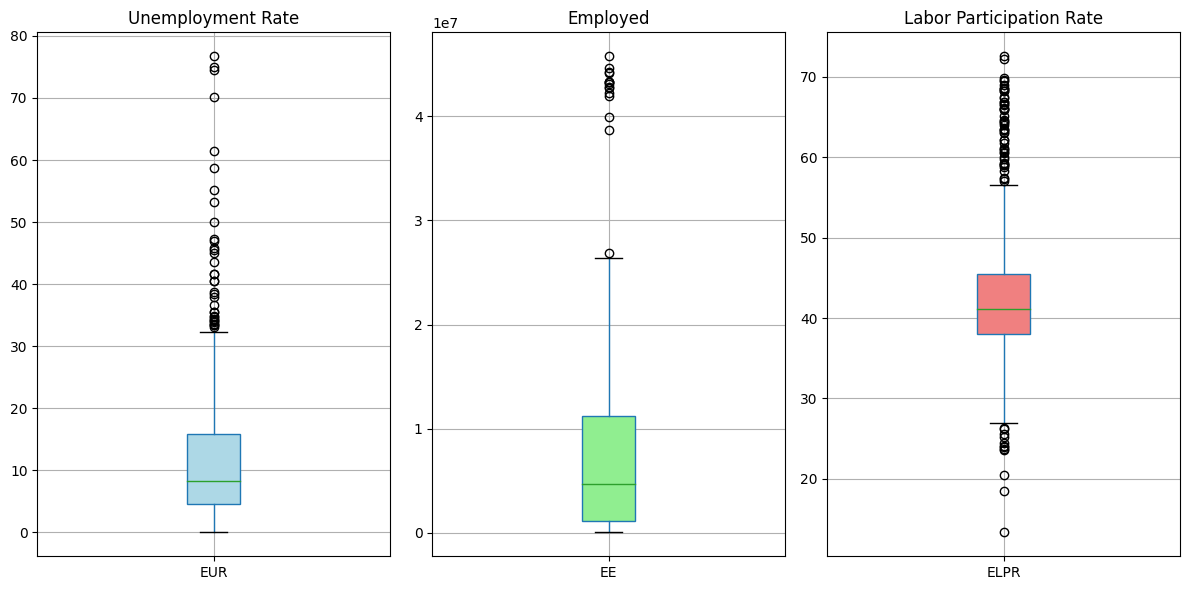

In [22]:
# Outlier detection
colors = ['lightblue', 'lightgreen', 'lightcoral']

# Create a figure with three subplots
plt.figure(figsize=(12, 6))

# Subplot 1: Unemployment Rate
plt.subplot(131)
df.boxplot(column='EUR', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[0])  # Set the color of the first box
plt.title('Unemployment Rate')

# Subplot 2: Employed
plt.subplot(132)
df.boxplot(column='EE', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[1])  # Set the color of the second box
plt.title('Employed')

# Subplot 3: Labor Participation Rate
plt.subplot(133)
df.boxplot(column='ELPR', patch_artist=True)
plt.gca().get_children()[0].set_facecolor(colors[2])  # Set the color of the third box
plt.title('Labor Participation Rate')

plt.tight_layout()
plt.show()

<u>`Comment :`</u>

Presence of outliers are detected. Since we are analyzing the unemployment during Covid-19 the extreme values in the data are indicative of genuine structural changes or such events therefore we wont remove it.

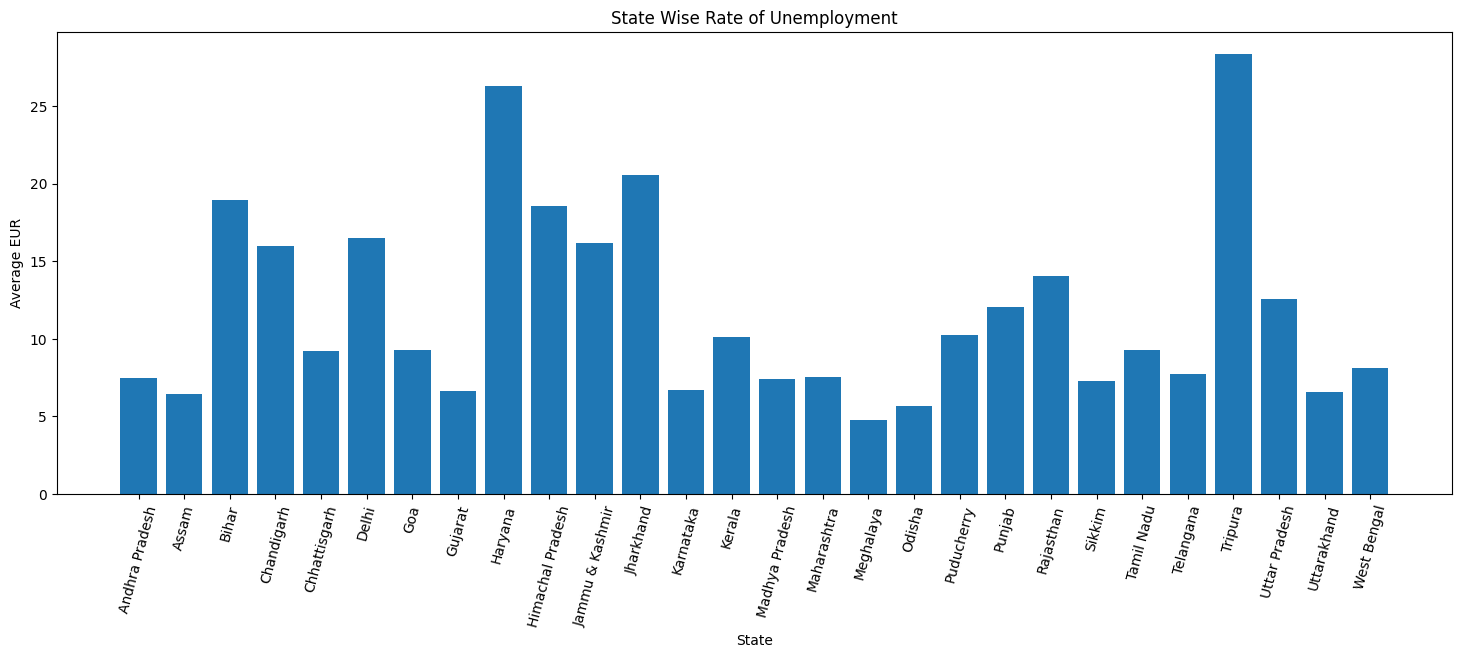

In [23]:
# Calculate the average EUR for each State
state_mean_eur = df[['State', 'EUR']].groupby('State').mean()

# Plotting the bar chart
plt.figure(figsize=(18, 6))
plt.bar(state_mean_eur.index, state_mean_eur['EUR'])

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average EUR')
plt.title('State Wise Rate of Unemployment')

# Rotate x-axis labels for better readability
plt.xticks(rotation=75)

# Display the plot
plt.show()

<u>`Comments :`</u>

* Among the states, `Tripura` exhibits the highest average EUR of 28.35%.

* Conversely, `Meghalaya` demonstrates the lowest average EUR, with a value of approximately 4.80%.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   State   740 non-null    object        
 1   Date    740 non-null    datetime64[ns]
 2   EUR     740 non-null    float64       
 3   EE      740 non-null    float64       
 4   ELPR    740 non-null    float64       
 5   Area    740 non-null    object        
 6   Month   740 non-null    int64         
 7   Year    740 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 52.0+ KB


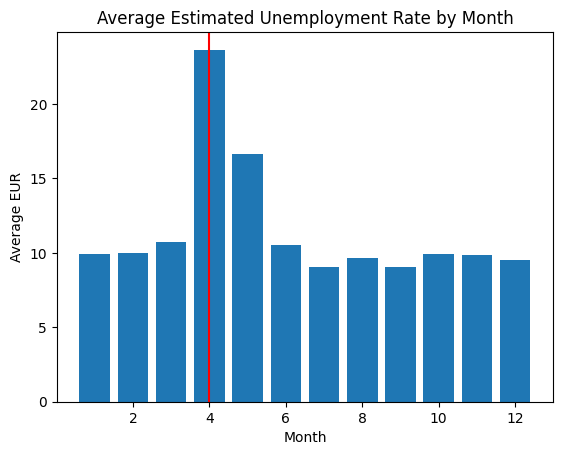

In [25]:
import matplotlib.pyplot as plt

# Assuming the DataFrame has a 'Month' column with month names and 'EUR' column

# Calculate the average EUR for each month
month_mean_eur = df.groupby('Month')['EUR'].mean()

# Find the month with the maximum average EUR
max_month = month_mean_eur.idxmax()

# Plotting the bar chart
plt.bar(month_mean_eur.index, month_mean_eur)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average EUR')
plt.title('Average Estimated Unemployment Rate by Month')

# Highlight the month with the maximum average EUR
plt.axvline(x=max_month, color='red', label=f'Max: {max_month}')

# Display the plot
plt.show()

<u>`Comments :`</u>

The month with the highest average EUR is highlighted with a red line `(April)`. This month represents the peak or maximum level of unemployment during the observed period.

In [26]:
df.groupby("Area").size()     # Balanced dataset

Area
Rural    359
Urban    381
dtype: int64

In [27]:
unemployment = df[["State", "Area", "EUR"]]
figure = px.sunburst(unemployment, path=["Area", "State"],
                     values="EUR",
                     width=700, height=700, color_continuous_scale="RdY2Gn",
                     title="Estimated Unemployment Rate")
figure.show()

During the Covid-19 pandemic, `Tripura` state has experienced a significant impact of the outbreak in both urban and rural areas, making it one of the most affected states. Following Tripura, `Haryana` state has also witnessed a considerable influence of the pandemic.